# Explainable and Responsible AI Toolkit (v1.0 - December 22, 2022)
***Developed by AI COE and DSS1***

The **DSAI Explainable and Responsible AI (XRAI) Toolkit** is a complementary tool to the [XRAI Guidelines document](https://unionbankphilippines.sharepoint.com/:w:/r/sites/DataScienceInsightsTeam/_layouts/15/Doc.aspx?sourcedoc=%7B6052036E-D049-4EE3-BCED-D4B9B5C65FEA%7D&file=XRAI%20Guidelines%20Document_working%20file.docx&action=default&mobileredirect=true) **(NOT THE FINAL FILE YET)**. The Toolkit provides a one-stop tool for technical tests were identified by packaging widely used open-source libraries into a single platform, according to ADI/DSAI user needs. These tools include Python libraries such as `dice-ml`, `econml`, `interpret-community`, `erroranalysis`, `scikit-learn`, and UI visualization libraries such as `raiwidgets`. This toolkit aims to: 
- Provide a user interface to guide users step-by-step in the testing process; 
- Support certain binary classification and regression models that use tabular data 
- Produce a basic summary report to help DSAI System Developers and Owners interpret test results 
- Intended to be deployable in the user’s environment

This Toolkit, along with the Guidelines document, is the first major version release. Subsequent versions and updates will be found in the XRAI Gitlab repo **(LINK PENDING)**, accompanied by quarterly XRAI Brownbag sessions.

# Introduction
## Assumptions / Limitations
The toolkit is in its first iterations of development. As such, there are limitations which hinders the Toolkit from being able to handle certain models and display other XRAI-related features. These include:
- V1 can only handle binary classification models 
- Only Python users for V1. An R-based Toolkit may be released according to demand and necessity for later versions 
- Certain features may be discussed in Guidelines V1 but are not yet in Toolkit V1 
- This notebook does not define ethical standards. It provides a way for DSAI System Developers and Owners to demonstrate their claims about the performance of their DSAI systems according to the XRAI principles
- `fairness.py` and `XRAI_features.py` are the source function codes containing all functions and will be updated in each release
- Protected groups are those groups you want to compare model performance on them to all data they can be defined as this format `{"feature name 1":  value, "feature name 2":  value,...}`  you can define as many protected groups as you want, and they can be numerical or even categorical, such as `{age: 23, sex: "female"}`.


## Inputs
Our interactive toolkit only needs two main inputs before any major analysis:
- Model (.pkl or .sav)
- Data (train, test) (.csv) 

We intend for the user to have inputs mostly on the XRAI-related functions. However, we need the user to manually input **the names of train and test file**, in addition to target variable name. Prompts will be shown later in the notebook where you will need to load. In the shared folder we have provided sample model and data (test_data.csv, train_data.csv, finalized_model.pkl). For testing for different models and data you may just replace files.

## Features found in the notebook
- Individual fairness disparity 
- Model performance overview
- Feature importance

## Features found in the Interactive UI
1. Error analysis 
2. Model overview (evaluation matrices on whole test data as well as single data point)
3. Data Analysis (statistics of predicted outcome, dataset features and error groups)
4. Feature importance (See how each feature is important for Individual data point and whole data seperately)
5. What-if analysis (observe how the model's prediction changes: Change features manually or specify the desired prediction 

# Functions

In [ ]:
#!pip install -r requirements.txt

In [6]:
# Call functions

%matplotlib inline

# load model and data
from data_model import load_data_model

#Performance overview 
from fairness import model_performance

# Fairness
from fairness import fairness

# File and model selection
Ingest the test and train csv files, target features, and model. 

In [2]:
# load required datasets and model
train_data = 'train_data.csv' ## INPUT HERE
test_data = 'test_data.csv' ## INPUT HERE
model_path = 'finalized_model.pkl' ## INPUT HERE
target_feature = 'class' ## INPUT HERE
# X_train = ''
# X_test = ''
# Y_train = ''
# Y_test  = ''

X_train, Y_train, X_test, Y_test, train_data, test_data, model = load_data_model(train_data, test_data, model_path, target_feature)

# Performance and Fairness

 `model_performance()`  gives an overview on model performance on test and train datasets also calculate performance for the previliged group(s) vs all other data points.

Performance on test data :

Accuracy on test data:  0.811


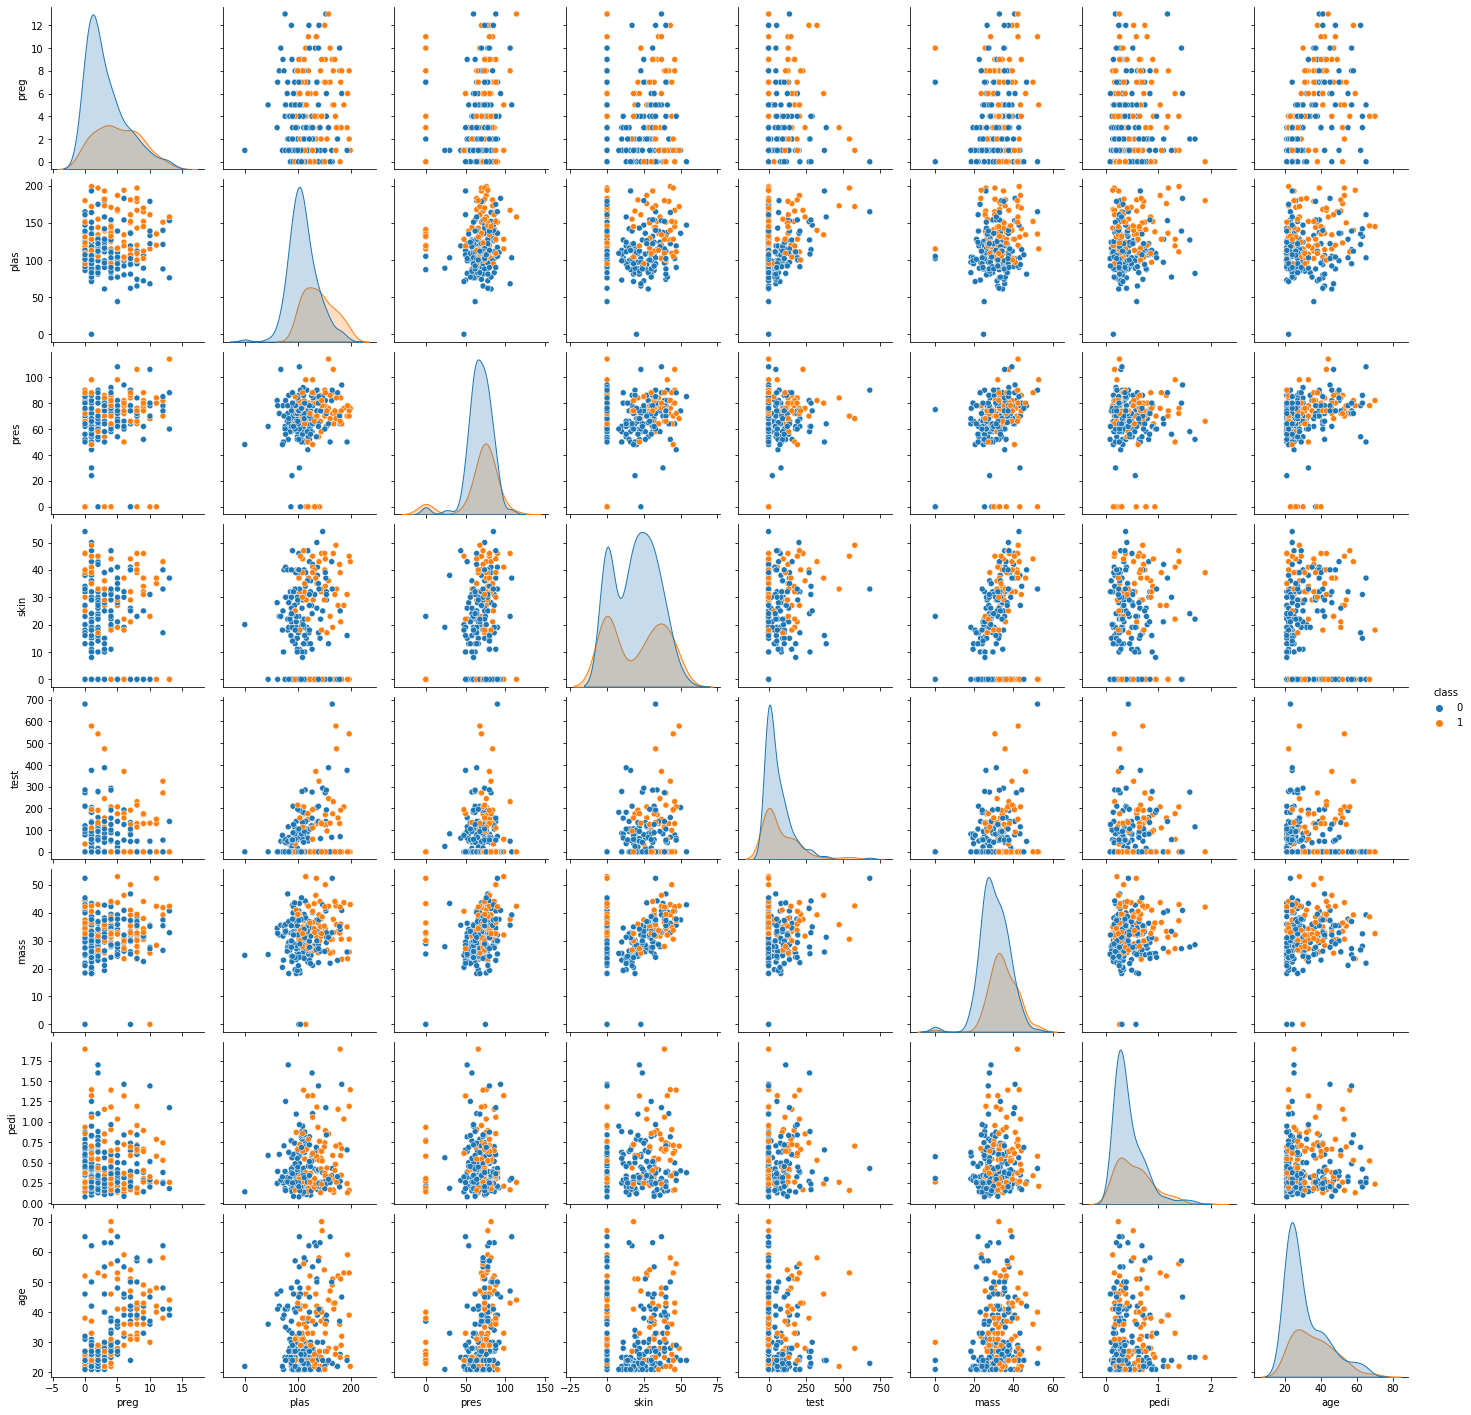

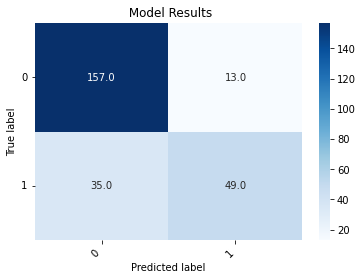

Performance on Train data :

Accuracy on test data:  0.765


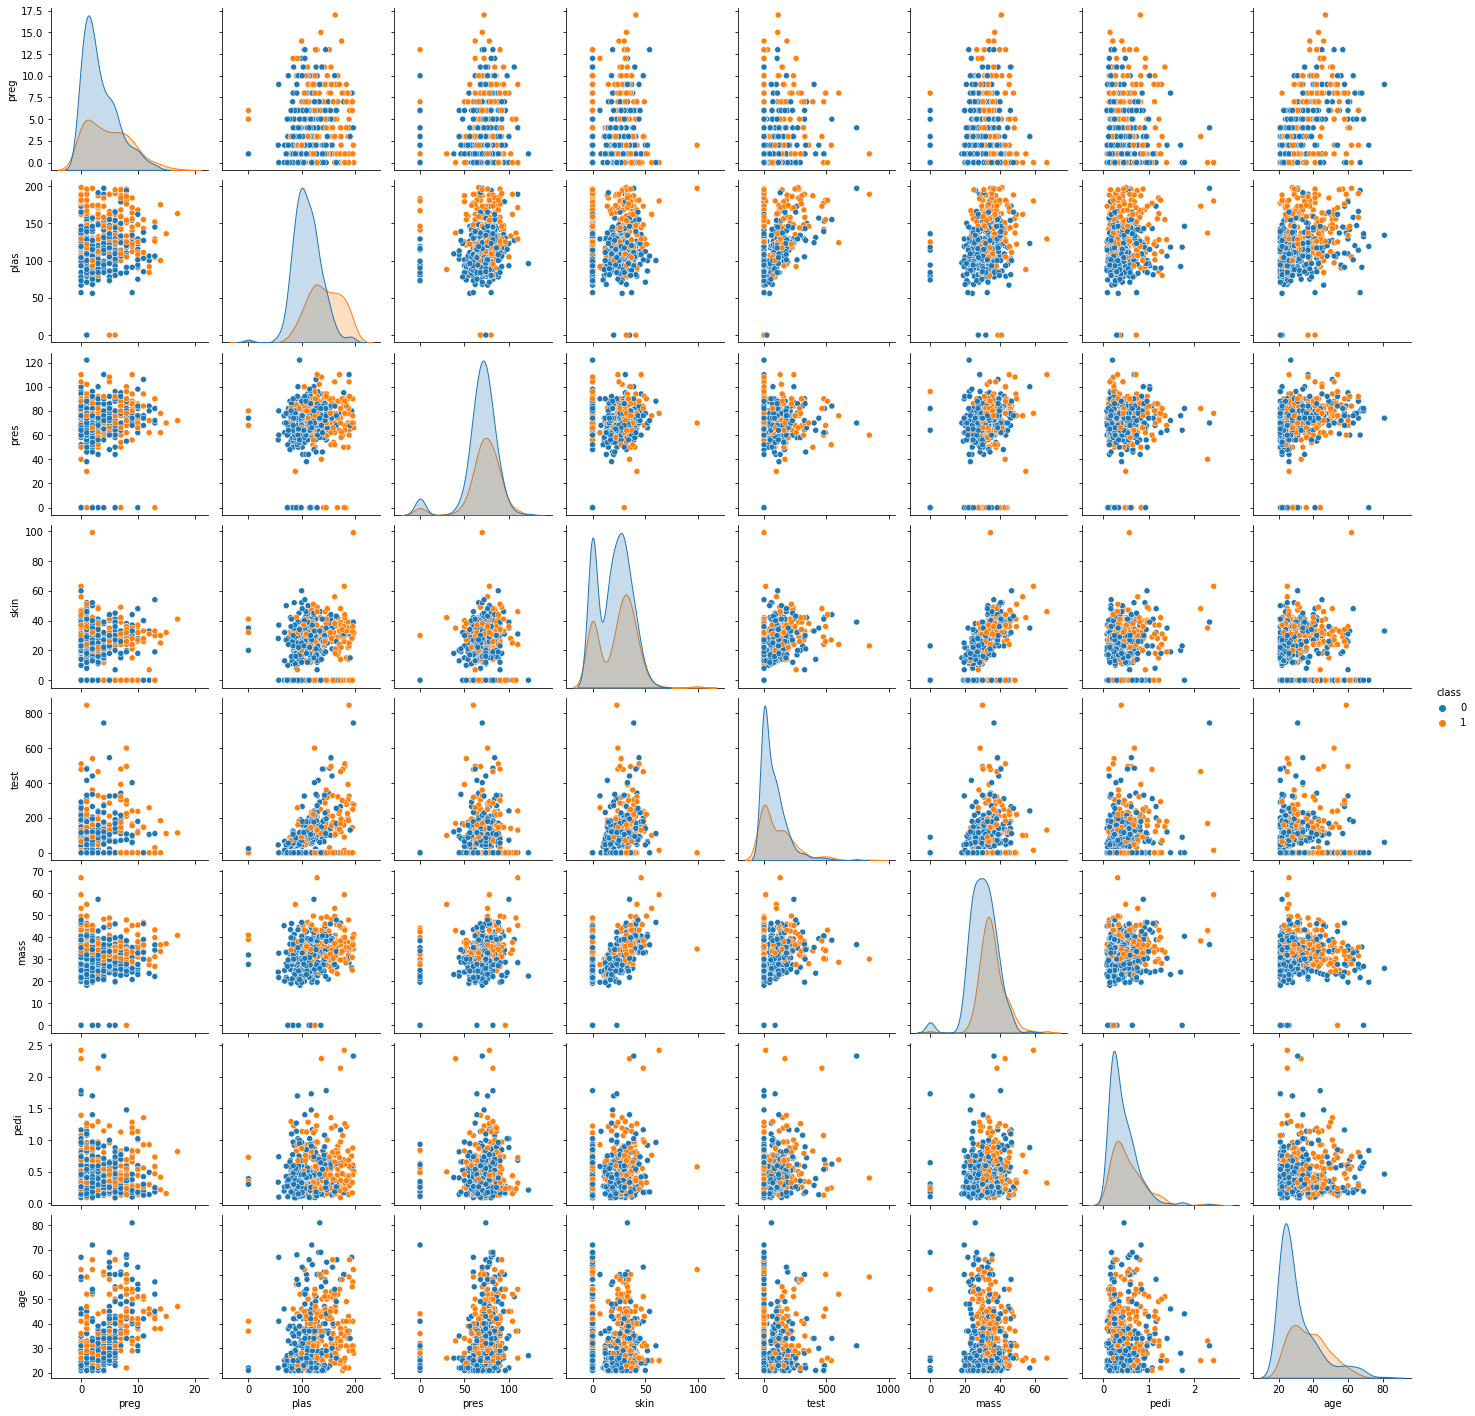

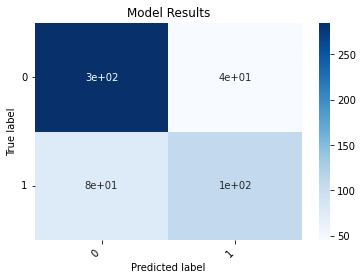

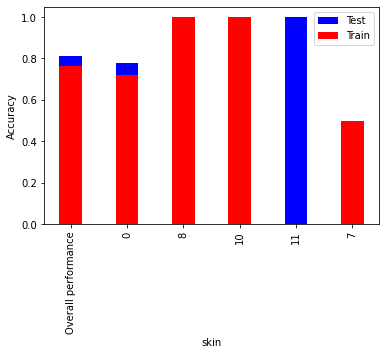

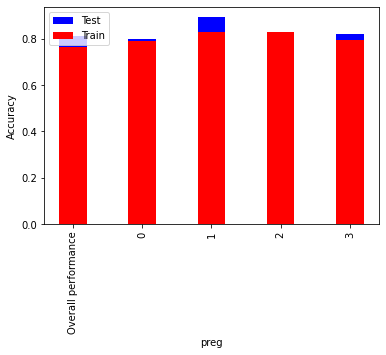

In [7]:
_ = model_performance(model, X_test, Y_test, X_train, Y_train, test_data, train_data, target_feature,previlaged_groups={"skin" : 0,"preg" : 13})

 `fairness()` function takes the model, data and privileged groups as an input, and then based on disparity index, calculates that eighter model is fair to the defined privileged groups or not. It provides other indexes like `Accuracy`,`True_positive_rate`, `False_positive_rate`, `False_negative_rate`, and `predicted_as_positive` of overall data and defined groups in a table for comparison.

In [7]:
fairness(model, X_test, Y_test, {"age" : 25,"preg" : 13})

In the US there is a legal precedent to set the cutoff to 0.8. That is the predicted as positive for the unprivileged group must not be less than 80% of that of the privileged group.
------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------age---------------------------------------------------------
For the previlage feature age of 25 the disparity index is 1.322


The model is fair towards the 25 in age
----------------------------------------------------preg---------------------------------------------------------
For the previlage feature preg of 13 the disparity index is 0.359


The model is NOT fair towards the 13 in preg


,Variable,Previledge_group,Accuracy,True_positive_rate,False_positive_rate,False_negative_rate,predicted_as_positive
0,Overall,,0.811,0.583,0.076,0.417,0.244
age,age,25,0.938,0.75,0.0,0.25,0.188
preg,preg,13,0.667,1.0,0.5,0.0,0.667


# Interactive UI Dashboard

Aside from this Notebook, we have an interactive UI dashboard which enables users to do XRAI-supported pre- and post-model analysis. We have following features incorporated in RAI Dashboard.
1. Error Analysis: Identify model errors and discover cohorts of data for which the model underperforms.
2. Model overview: Evaluate model performance metrics, Understand the most important factors impacting your model’s predictions. Explore your dataset statistics 
3. Data exploration: Find out error segments where model underperforms and then see data exploration/statistics for these segments and many more
4. Feature importance: We have capability to understand global feature importance, individual variable feature importance(group wise for ex. age more than 40 contributes more towards model predictions) or can visualize row wise (customer wise) importance.

All the above features can be analyzed on an entire train, or test data. Similarly, you may also define custom segments/groups/cohorts. For instance, you can use the explanation dashboard to understand which factors (a.k.a features) have the most impact on your loan allocation model's accept/deny decisions. Observe this for the whole population, for a subset of applicants (e.g., age < 40>), and individuals (such as why Person A's loan got rejected).

The Responsible AI Toolbox is a **customizable** kit, each component having a variety of tabs and buttons. With this dashboard, you can identify model errors, diagnose why those errors are happening, and mitigate them.

In [16]:
# Import required libraries/packages
from XRAI_features import xrai_features
from raiwidgets import ResponsibleAIDashboard

In [17]:
# Take 50 samples from the test data
#test_data_sample = test_data.sample(n=50, random_state=5)

# or choose entire test data
test_data_sample = test_data #.sample(n=50, random_state=5)

In [18]:
rai_insights, cohort_list = xrai_features(model, train_data, test_data_sample, target_feature)

# Create Dashboard
ResponsibleAIDashboard(rai_insights, cohort_list=cohort_list)

ResponsibleAI started at http://localhost:5001


In [19]:
!pip install explainerdashboard

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from sklearn.ensemble import RandomForestClassifier

from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, feature_descriptions
#X_train, Y_train, X_test, Y_test, train_data, test_data, model


explainer = ClassifierExplainer(model, X_test, Y_test, 
                               
                               descriptions=feature_descriptions,
                               labels=['Not diabeties', 'diabeties'])

ExplainerDashboard(explainer).run()

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Ca

 * Running on all addresses.
 * Running on http://10.24.33.237:8050/ (Press CTRL+C to quit)
10.24.33.237 - - [15/Feb/2023 16:18:01] "GET / HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "GET /_dash-layout HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "GET /_dash-dependencies HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "POST /_dash-update-component HTTP/1.1" 204 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:01] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237

10.24.33.237 - - [15/Feb/2023 16:18:20] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:20] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:20] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:20] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:20] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:20] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:42] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:43] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:18:58] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:19:27] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 16:19:29] "POST /_dash-update-component HTTP/1.1" 200 -
10.24.33.237 - - [15/Feb/2023 

In [25]:
y_test

0      1
1      1
2      0
3      1
4      1
      ..
195    0
196    1
197    0
198    0
199    0
Name: Survival, Length: 200, dtype: int64